# Umsatzdaten

WETTERDATEN ANALYSE

Datensatz geladen: 2601 Zeilen, 5 Spalten
Spalten: ['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']
Datumsspalte gefunden: Datum
Temperaturspalte: Temperatur

Erste 5 Zeilen:
       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  month  \
0 2012-01-01         8.0      9.8250                   14        58.0      1   
1 2012-01-02         7.0      7.4375                   12         NaN      1   
2 2012-01-03         8.0      5.5375                   18        63.0      1   
3 2012-01-04         4.0      5.6875                   19        80.0      1   
4 2012-01-05         6.0      5.3000                   23        80.0      1   

  month_name  
0    January  
1    January  
2    January  
3    January  
4    January  

AUFGABE 1: DURCHSCHNITTLICHE GESAMTTEMPERATUR

✓ Durchschnittliche Gesamttemperatur: 12.10°C
  - Anzahl Messungen: 2601
  - Standardabweichung: 7.17°C
  - Minimum: -10.25°C
  - Maximum: 32.67°C
  - Median: 

/tmp/ipykernel_6248/3220162401.py:188: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=['Mai', 'Juli'], patch_artist=True)



✓ Visualisierung gespeichert als 'wetter_analyse_komplett.png'


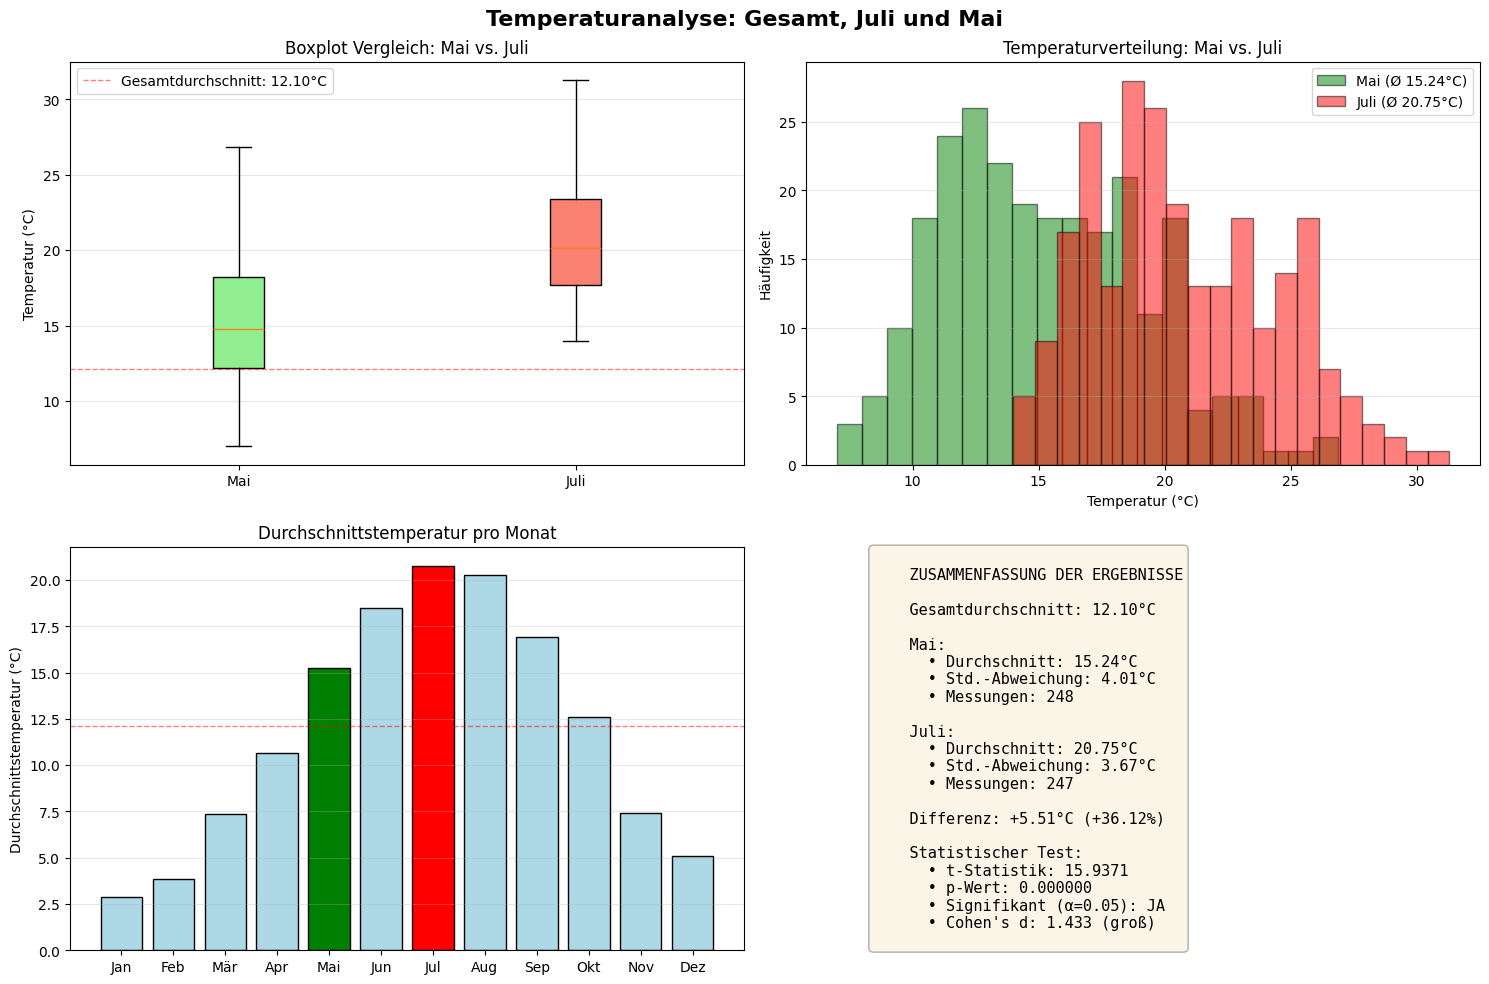


ANALYSE ABGESCHLOSSEN


In [3]:

"""
Wetterdaten Analyse - Aufgaben:
1. Berechne die durchschnittliche Gesamttemperatur
2. Berechne die durchschnittliche Temperatur für Juli
3. Vergleiche ob Juli und Mai sich signifikant unterscheiden
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ============================================
# DATEN LADEN
# ============================================
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv"
df = pd.read_csv(url)

print("=" * 70)
print("WETTERDATEN ANALYSE")
print("=" * 70)
print(f"\nDatensatz geladen: {len(df)} Zeilen, {len(df.columns)} Spalten")
print(f"Spalten: {df.columns.tolist()}")

# Konvertiere Datumsspalte falls vorhanden
date_columns = [col for col in df.columns if 'date' in col.lower() or 'datum' in col.lower()]
if date_columns:
    df[date_columns[0]] = pd.to_datetime(df[date_columns[0]], errors='coerce')
    df['month'] = df[date_columns[0]].dt.month
    df['month_name'] = df[date_columns[0]].dt.month_name()
    print(f"Datumsspalte gefunden: {date_columns[0]}")

# Finde Temperaturspalte
temp_columns = [col for col in df.columns if 'temp' in col.lower() or 'temperatur' in col.lower()]
if not temp_columns:
    print("\nWARNUNG: Keine Temperaturspalte gefunden!")
    print("Verfügbare Spalten:", df.columns.tolist())
    temp_col = df.select_dtypes(include=[np.number]).columns[0]
    print(f"Verwende stattdessen: {temp_col}")
else:
    temp_col = temp_columns[0]

print(f"Temperaturspalte: {temp_col}")
print("\nErste 5 Zeilen:")
print(df.head())


# ============================================
# AUFGABE 1: GESAMTDURCHSCHNITTSTEMPERATUR
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 1: DURCHSCHNITTLICHE GESAMTTEMPERATUR")
print("=" * 70)

overall_avg = df[temp_col].mean()
overall_count = df[temp_col].count()
overall_std = df[temp_col].std()

print(f"\n✓ Durchschnittliche Gesamttemperatur: {overall_avg:.2f}°C")
print(f"  - Anzahl Messungen: {overall_count}")
print(f"  - Standardabweichung: {overall_std:.2f}°C")
print(f"  - Minimum: {df[temp_col].min():.2f}°C")
print(f"  - Maximum: {df[temp_col].max():.2f}°C")
print(f"  - Median: {df[temp_col].median():.2f}°C")


# ============================================
# AUFGABE 2: DURCHSCHNITTSTEMPERATUR JULI
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 2: DURCHSCHNITTSTEMPERATUR FÜR JULI")
print("=" * 70)

if 'month' in df.columns:
    df_july = df[df['month'] == 7]
    
    if len(df_july) > 0:
        july_avg = df_july[temp_col].mean()
        july_count = len(df_july)
        july_std = df_july[temp_col].std()
        
        print(f"\n✓ Durchschnittstemperatur Juli: {july_avg:.2f}°C")
        print(f"  - Anzahl Messungen: {july_count}")
        print(f"  - Standardabweichung: {july_std:.2f}°C")
        print(f"  - Minimum: {df_july[temp_col].min():.2f}°C")
        print(f"  - Maximum: {df_july[temp_col].max():.2f}°C")
        print(f"  - Differenz zum Gesamtdurchschnitt: {july_avg - overall_avg:+.2f}°C")
    else:
        print("\n⚠ Keine Daten für Juli gefunden!")
        july_avg = None
else:
    print("\n⚠ Keine Monatsinformation verfügbar!")
    july_avg = None


# ============================================
# AUFGABE 3: VERGLEICH JULI VS. MAI
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 3: VERGLEICH JULI VS. MAI")
print("=" * 70)

if 'month' in df.columns:
    df_may = df[df['month'] == 5]
    df_july = df[df['month'] == 7]
    
    if len(df_may) > 0 and len(df_july) > 0:
        may_avg = df_may[temp_col].mean()
        may_std = df_may[temp_col].std()
        may_count = len(df_may)
        
        july_avg = df_july[temp_col].mean()
        july_std = df_july[temp_col].std()
        july_count = len(df_july)
        
        difference = july_avg - may_avg
        
        print(f"\n📊 DESKRIPTIVE STATISTIK:")
        print(f"\nMai:")
        print(f"  - Durchschnitt: {may_avg:.2f}°C")
        print(f"  - Standardabweichung: {may_std:.2f}°C")
        print(f"  - Anzahl Messungen: {may_count}")
        
        print(f"\nJuli:")
        print(f"  - Durchschnitt: {july_avg:.2f}°C")
        print(f"  - Standardabweichung: {july_std:.2f}°C")
        print(f"  - Anzahl Messungen: {july_count}")
        
        print(f"\nDifferenz: {difference:+.2f}°C")
        print(f"Prozentuale Differenz: {(difference/may_avg*100):+.2f}%")
        
        # STATISTISCHE SIGNIFIKANZ: t-Test
        print(f"\n🔬 STATISTISCHER SIGNIFIKANZTEST (t-Test):")
        
        t_statistic, p_value = stats.ttest_ind(
            df_july[temp_col].dropna(), 
            df_may[temp_col].dropna()
        )
        
        print(f"\n  t-Statistik: {t_statistic:.4f}")
        print(f"  p-Wert: {p_value:.6f}")
        
        alpha = 0.05
        print(f"\n  Signifikanzniveau (α): {alpha}")
        
        if p_value < alpha:
            print(f"\n  ✓ ERGEBNIS: Die Monate unterscheiden sich SIGNIFIKANT!")
            print(f"    (p = {p_value:.6f} < α = {alpha})")
            print(f"    → Juli ist im Durchschnitt {abs(difference):.2f}°C wärmer als Mai.")
        else:
            print(f"\n  ✗ ERGEBNIS: Die Monate unterscheiden sich NICHT signifikant.")
            print(f"    (p = {p_value:.6f} ≥ α = {alpha})")
        
        # Effektstärke (Cohen's d)
        pooled_std = np.sqrt(((may_count - 1) * may_std**2 + (july_count - 1) * july_std**2) / 
                             (may_count + july_count - 2))
        cohens_d = difference / pooled_std
        
        print(f"\n  Effektstärke (Cohen's d): {cohens_d:.3f}")
        if abs(cohens_d) < 0.2:
            effect = "klein"
        elif abs(cohens_d) < 0.5:
            effect = "mittel"
        else:
            effect = "groß"
        print(f"  → Effekt ist {effect}")
        
    else:
        print("\n⚠ Nicht genügend Daten für beide Monate!")
else:
    print("\n⚠ Keine Monatsinformation verfügbar!")


# ============================================
# VISUALISIERUNG
# ============================================
if 'month' in df.columns and len(df_may) > 0 and len(df_july) > 0:
    print("\n" + "=" * 70)
    print("VISUALISIERUNG")
    print("=" * 70)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Temperaturanalyse: Gesamt, Juli und Mai', fontsize=16, fontweight='bold')
    
    # Plot 1: Boxplot Vergleich
    ax1 = axes[0, 0]
    data_to_plot = [df_may[temp_col].dropna(), df_july[temp_col].dropna()]
    bp = ax1.boxplot(data_to_plot, labels=['Mai', 'Juli'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('salmon')
    ax1.set_ylabel('Temperatur (°C)')
    ax1.set_title('Boxplot Vergleich: Mai vs. Juli')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1, 
                alpha=0.5, label=f'Gesamtdurchschnitt: {overall_avg:.2f}°C')
    ax1.legend()
    
    # Plot 2: Histogramme überlagert
    ax2 = axes[0, 1]
    ax2.hist(df_may[temp_col].dropna(), bins=20, alpha=0.5, label=f'Mai (Ø {may_avg:.2f}°C)', 
             color='green', edgecolor='black')
    ax2.hist(df_july[temp_col].dropna(), bins=20, alpha=0.5, label=f'Juli (Ø {july_avg:.2f}°C)', 
             color='red', edgecolor='black')
    ax2.set_xlabel('Temperatur (°C)')
    ax2.set_ylabel('Häufigkeit')
    ax2.set_title('Temperaturverteilung: Mai vs. Juli')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: Monatliche Durchschnittstemperaturen
    ax3 = axes[1, 0]
    monthly_avg = df.groupby('month')[temp_col].mean().sort_index()
    months = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    colors = ['lightblue' if i not in [4, 6] else ('green' if i == 4 else 'red') 
              for i in range(len(monthly_avg))]
    ax3.bar(range(len(monthly_avg)), monthly_avg.values, color=colors, edgecolor='black')
    ax3.set_xticks(range(len(monthly_avg)))
    ax3.set_xticklabels([months[i-1] for i in monthly_avg.index])
    ax3.set_ylabel('Durchschnittstemperatur (°C)')
    ax3.set_title('Durchschnittstemperatur pro Monat')
    ax3.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1, alpha=0.5)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Plot 4: Statistische Zusammenfassung
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    summary_text = f"""
    ZUSAMMENFASSUNG DER ERGEBNISSE
    
    Gesamtdurchschnitt: {overall_avg:.2f}°C
    
    Mai:
      • Durchschnitt: {may_avg:.2f}°C
      • Std.-Abweichung: {may_std:.2f}°C
      • Messungen: {may_count}
    
    Juli:
      • Durchschnitt: {july_avg:.2f}°C
      • Std.-Abweichung: {july_std:.2f}°C
      • Messungen: {july_count}
    
    Differenz: {difference:+.2f}°C ({(difference/may_avg*100):+.2f}%)
    
    Statistischer Test:
      • t-Statistik: {t_statistic:.4f}
      • p-Wert: {p_value:.6f}
      • Signifikant (α=0.05): {'JA' if p_value < 0.05 else 'NEIN'}
      • Cohen's d: {cohens_d:.3f} ({effect})
    """
    
    ax4.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
             verticalalignment='center', bbox=dict(boxstyle='round', 
             facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.savefig('wetter_analyse_komplett.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualisierung gespeichert als 'wetter_analyse_komplett.png'")
    plt.show()

print("\n" + "=" * 70)
print("ANALYSE ABGESCHLOSSEN")
print("=" * 70)